# Import Stuff

In [85]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Default Code, Don't Edit This

In [86]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport

def sum_over(*args):
    return sum(args)

In [87]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario, SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [88]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
#for unc in dike_model.uncertainties:
    #print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

In [89]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
#for policy in dike_model.levers:
    #print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

In [90]:
#enlisting outcomes
#for outcome in dike_model.outcomes:
    #print(repr(outcome))

# Creating the Policies
### Edit this stuff

In [91]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy
#testing Secnario 0 - Baseline
policies = [Policy('policy 0', **{'0_RfR 0':0,
                                  '0_RfR 1':0,
                                  '0_RfR 2':0,
                                  'A.1_DikeIncrease 0':9,
                                  'A.1_DikeIncrease 1':9,
                                  'A.1_DikeIncrease 2':9,
                                  '1_RfR 0':0,
                                  '1_RfR 1':0,
                                  '1_RfR 2':0,
                                  'A.2_DikeIncrease 0':9,
                                  'A.2_DikeIncrease 1':9,
                                  'A.2_DikeIncrease 2':9,
                                  '2_RfR 0':0,
                                  '2_RfR 1':0,
                                  '2_RfR 2':0,
                                  'A.3_DikeIncrease 0':9,
                                  'A.3_DikeIncrease 1':9,
                                  'A.3_DikeIncrease 2':9,
                                  '3_RfR 0':0,
                                  '3_RfR 1':0,
                                  '3_RfR 2':0,
                                  'A.4_DikeIncrease 0':9,
                                  'A.4_DikeIncrease 1':9,
                                  'A.4_DikeIncrease 2':9,
                                  '4_RfR 0':0,
                                  '4_RfR 1':0,
                                  '4_RfR 2':0,
                                  'A.5_DikeIncrease 0':9,
                                  'A.5_DikeIncrease 1':9,
                                  'A.5_DikeIncrease 2':9,
                                  'EWS_DaysToThreat':0
                                  })]

# Running the Model
### You can edit the number of scenarios to help adjust runtime, more is kind of better

In [92]:
#pass the policies list to EMA workbench experiment runs
n_scenarios = 1000
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
100%|██████████████████████████████████████| 1000/1000 [14:17<00:00,  1.17it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [93]:
experiments, outcomes = results
experiments.to_csv('./output/00_Policy_0_Experiments.csv', index=False)
pd.DataFrame.from_dict(outcomes).to_csv('./output/00_Policy_0_Outcomes.csv', index=False)

### Edit the column for outcome to see different results

In [94]:
from ema_workbench.analysis import prim
x = experiments
y = outcomes["A.2 Total Costs"] < 2.5e+08
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

AssertionError: 

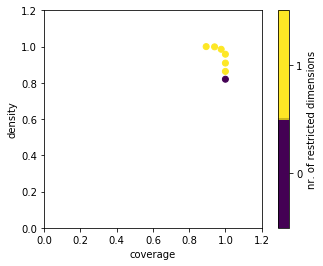

In [95]:
box1.show_tradeoff()
plt.show()

### Edit the column for outcome to see different results

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


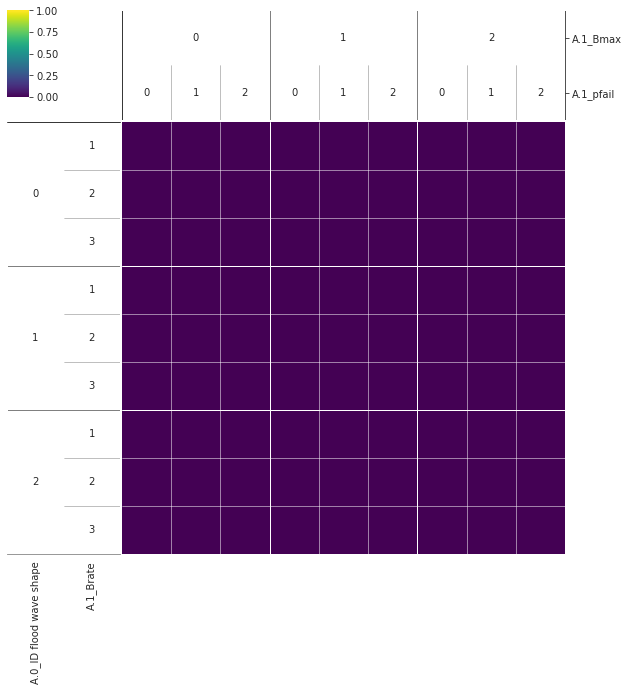

1000


In [96]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes["A.2 Total Costs"] < 2.5e08

dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()
print(len(y))


### change which parts of the experiments table it outputs to see the figure better

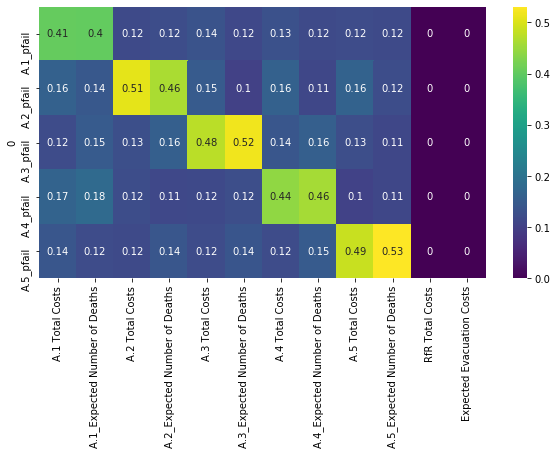

In [97]:
from ema_workbench.analysis import feature_scoring

x = experiments.loc[:,['A.1_pfail', 'A.2_pfail', 'A.3_pfail', 'A.4_pfail', 'A.5_pfail']]
y = outcomes

plt.figure(figsize = (10,5))

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True, )

plt.show()

__OUTPUT PLOTTER__

The first cell just creates the dictionaries from the output, the second and third cell do the plots. Then we make the Dataframe

 __First fill in the run number below__  (as a string, just fill it in between the quotation marks)

In [98]:
run_number = "1_3" # Run number plz

In [99]:
A1_cost = outcomes["A.1 Total Costs"]
A2_cost = outcomes["A.2 Total Costs"]
A3_cost = outcomes["A.3 Total Costs"]
A4_cost = outcomes["A.4 Total Costs"]
A5_cost = outcomes["A.5 Total Costs"]
A1_death = outcomes["A.1_Expected Number of Deaths"]
A2_death = outcomes["A.2_Expected Number of Deaths"]
A3_death = outcomes["A.3_Expected Number of Deaths"]
A4_death = outcomes["A.4_Expected Number of Deaths"]
A5_death = outcomes["A.5_Expected Number of Deaths"]
costs = [A1_cost,A2_cost,A3_cost,A4_cost,A5_cost]
death = [A1_death,A2_death,A3_death,A4_death,A5_death]
costs_dict = {}
death_dict = {}
for i in range(len(costs)):
    segment_costs = costs[i]
    segment_death = death[i]
    avg_costs = np.average(segment_costs)
    avg_death = np.average(segment_death)
    costs_dict['Costs A' + str(i+1)] = avg_costs
    death_dict['Deaths A' + str(i+1)] = avg_death


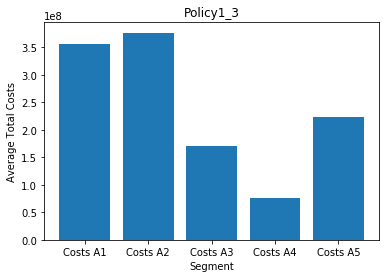

In [100]:
names = list(costs_dict.keys())
values = list(costs_dict.values())

plt.bar(range(len(costs_dict)), values, tick_label=names)
plt.xlabel('Segment')
plt.ylabel('Average Total Costs')
plt.title("Policy" + str(run_number))
plt.show()

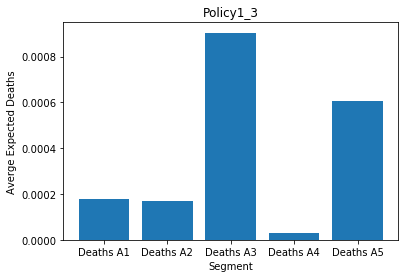

In [101]:
names = list(death_dict.keys())
values = list(death_dict.values())

plt.bar(range(len(death_dict)), values, tick_label=names)
plt.xlabel('Segment')
plt.ylabel('Averge Expected Deaths')
plt.title("Policy" + str(run_number))
plt.show()

In [102]:
df_costs = pd.DataFrame([costs_dict], index=["Policy" + str(run_number),])
df_death = pd.DataFrame([death_dict], index=["Policy" + str(run_number),])

In [103]:
df = pd.concat([df_costs,df_death],axis=1)
df 

,Costs A1,Costs A2,Costs A3,Costs A4,Costs A5,Deaths A1,Deaths A2,Deaths A3,Deaths A4,Deaths A5
Policy1_3,3.569375e+08,3.767015e+08,1.703431e+08,7.596520e+07,2.228586e+08,0.000179,0.000172,0.000904,0.00003,0.000606


__RUN THIS ONLY ONCE__ on the first time you run the code

In [24]:
Master_df = df #RUN THIS ONLY ONCE!!!!!!

__RUN THIS EVERY TIME YOU DO A NEW RUN__

In [104]:
Master_df = pd.concat([Master_df,df],axis=0)

In [105]:
Master_df

,Costs A1,Costs A2,Costs A3,Costs A4,Costs A5,Deaths A1,Deaths A2,Deaths A3,Deaths A4,Deaths A5
Policy02,0.000000e+00,6.968472e+07,3.922454e+07,4.355095e+06,2.159082e+07,0.000000,0.061400,0.064770,0.001651,0.018641
Policy03,9.632164e+08,5.969716e+07,5.998819e+07,9.111950e+06,1.084604e+08,0.663954,0.052468,0.097947,0.003796,0.097662
Policy04,0.000000e+00,1.566413e+08,3.139588e+08,1.037409e+07,1.265881e+07,0.000000,0.142060,0.532062,0.004263,0.010936
Policy1_3,3.569375e+08,3.767015e+08,1.703431e+08,7.596520e+07,2.228586e+08,0.000179,0.000172,0.000904,0.000030,0.000606


In [117]:
merge = pd.read_csv('intermediate.csv', index_col=0)
merge

,Costs A1,Costs A2,Costs A3,Costs A4,Costs A5,Deaths A1,Deaths A2,Deaths A3,Deaths A4,Deaths A5
Policy0_0,1.172700e+09,1.542487e+08,4.299761e+08,1.900943e+07,6.362715e+07,0.799299,0.140017,0.745159,0.008403,0.055620
Policy1_1,5.809244e+08,1.909016e+08,2.768656e+08,3.243985e+07,1.321141e+08,0.325999,0.068695,0.377923,0.006021,0.049289
Policy1_2,5.809244e+08,1.909016e+08,2.768656e+08,3.243985e+07,1.321141e+08,0.325999,0.068695,0.377923,0.006021,0.049289


In [121]:
master_df = pd.concat([Master_df,merge])
master_df

,Costs A1,Costs A2,Costs A3,Costs A4,Costs A5,Deaths A1,Deaths A2,Deaths A3,Deaths A4,Deaths A5
Policy02,0.000000e+00,6.968472e+07,3.922454e+07,4.355095e+06,2.159082e+07,0.000000,0.061400,0.064770,0.001651,0.018641
Policy03,9.632164e+08,5.969716e+07,5.998819e+07,9.111950e+06,1.084604e+08,0.663954,0.052468,0.097947,0.003796,0.097662
Policy04,0.000000e+00,1.566413e+08,3.139588e+08,1.037409e+07,1.265881e+07,0.000000,0.142060,0.532062,0.004263,0.010936
Policy1_3,3.569375e+08,3.767015e+08,1.703431e+08,7.596520e+07,2.228586e+08,0.000179,0.000172,0.000904,0.000030,0.000606
Policy0_0,1.172700e+09,1.542487e+08,4.299761e+08,1.900943e+07,6.362715e+07,0.799299,0.140017,0.745159,0.008403,0.055620
Policy1_1,5.809244e+08,1.909016e+08,2.768656e+08,3.243985e+07,1.321141e+08,0.325999,0.068695,0.377923,0.006021,0.049289
Policy1_2,5.809244e+08,1.909016e+08,2.768656e+08,3.243985e+07,1.321141e+08,0.325999,0.068695,0.377923,0.006021,0.049289


In [166]:
master_df = master_df.sort_index()
master_df = master_df.T
master_df = master_df[['Policy0_0', 'Policy1_1', 'Policy1_2', 'Policy1_3', 'Policy02', 'Policy03', 'Policy04']]
master_df

KeyError: "None of [Index(['Policy0_0', 'Policy1_1', 'Policy1_2', 'Policy1_3', 'Policy02',\n       'Policy03', 'Policy04'],\n      dtype='object')] are in the [columns]"

In [162]:
x = master_df.iloc[0,:].tolist()
master_df

,Policy0_0,Policy1_1,Policy1_2,Policy1_3,Policy02,Policy03,Policy04
Costs A1,1.172700e+09,5.809244e+08,5.809244e+08,3.569375e+08,0.000000e+00,9.632164e+08,0.000000e+00
Costs A2,1.542487e+08,1.909016e+08,1.909016e+08,3.767015e+08,6.968472e+07,5.969716e+07,1.566413e+08
Costs A3,4.299761e+08,2.768656e+08,2.768656e+08,1.703431e+08,3.922454e+07,5.998819e+07,3.139588e+08
Costs A4,1.900943e+07,3.243985e+07,3.243985e+07,7.596520e+07,4.355095e+06,9.111950e+06,1.037409e+07
Costs A5,6.362715e+07,1.321141e+08,1.321141e+08,2.228586e+08,2.159082e+07,1.084604e+08,1.265881e+07
Deaths A1,7.992990e-01,3.259991e-01,3.259991e-01,1.790869e-04,0.000000e+00,6.639543e-01,0.000000e+00
Deaths A2,1.400171e-01,6.869536e-02,6.869536e-02,1.716192e-04,6.139959e-02,5.246836e-02,1.420596e-01
Deaths A3,7.451591e-01,3.779232e-01,3.779232e-01,9.044317e-04,6.476956e-02,9.794718e-02,5.320620e-01
Deaths A4,8.403454e-03,6.020826e-03,6.020826e-03,3.049644e-05,1.650707e-03,3.796006e-03,4.263097e-03
Deaths A5,5.561964e-02,4.928892e-02,4.928892e-02,6.059673e-04,1.864109e-02,9.766202e-02,1.093615e-02


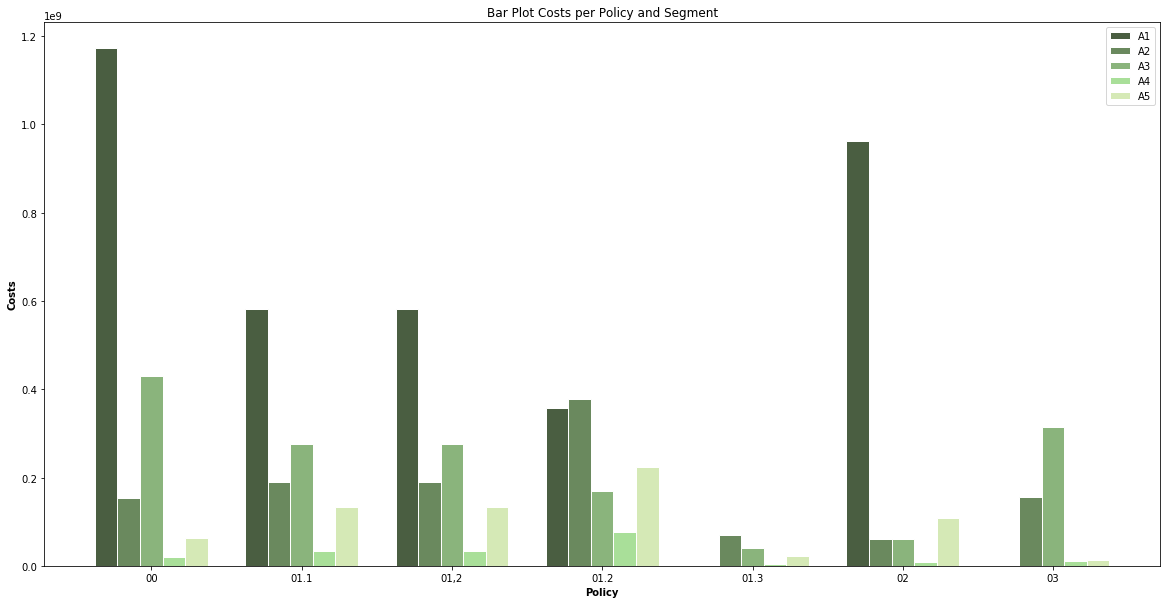

In [164]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.15
plt.figure(figsize = (20,10))
 
# set heights of bars --> outputs
bars1 = master_df.iloc[0,:].tolist()
bars2 = master_df.iloc[1,:].tolist()
bars3 = master_df.iloc[2,:].tolist()
bars4 = master_df.iloc[3,:].tolist()
bars5 = master_df.iloc[4,:].tolist()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.bar(r1, bars1, color='#4A5E41', width=barWidth, edgecolor='white', label='A1')
plt.bar(r2, bars2, color='#6A895E', width=barWidth, edgecolor='white', label='A2')
plt.bar(r3, bars3, color='#8AB47C', width=barWidth, edgecolor='white', label='A3')
plt.bar(r4, bars4, color='#A9DF99', width=barWidth, edgecolor='white', label='A4')
plt.bar(r5, bars5, color='#D5E9B6', width=barWidth, edgecolor='white', label='A5')


# Add xticks on the middle of the group bars
plt.xlabel('Policy', fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(bars1))], ['00', '01.1','01,2','01.2','01.3', '02', '03', '04'])
plt.ylabel('Costs', fontweight='bold')

plt.title("Bar Plot Costs per Policy and Segment")
plt.legend()
plt.show()

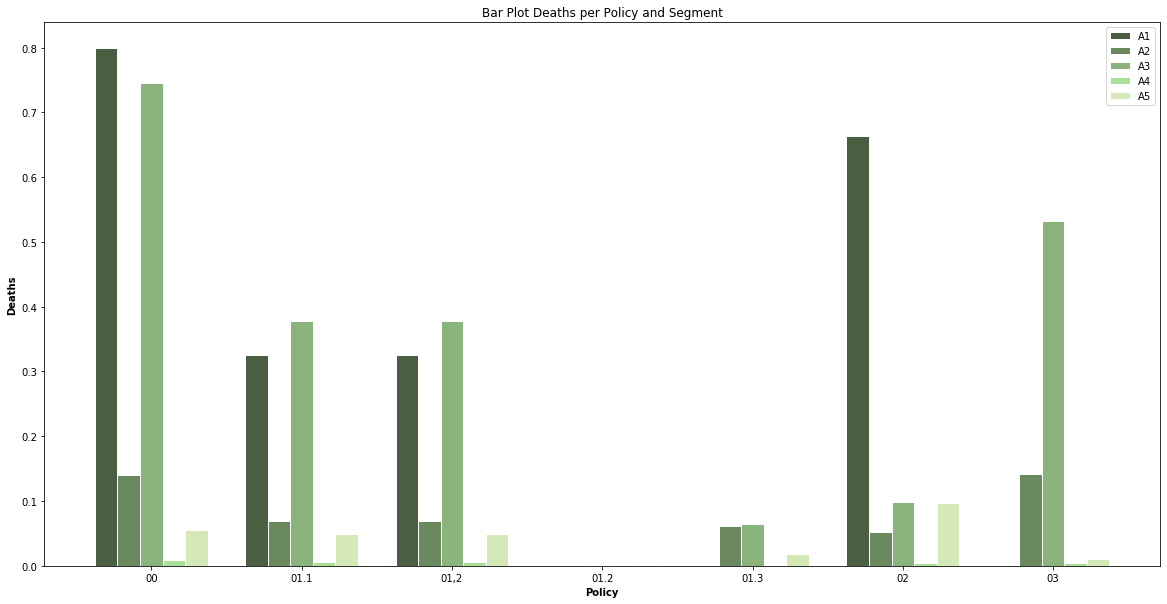

In [165]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.15
plt.figure(figsize = (20,10))
 
# set heights of bars --> outputs
bars1 = master_df.iloc[5,:].tolist()
bars2 = master_df.iloc[6,:].tolist()
bars3 = master_df.iloc[7,:].tolist()
bars4 = master_df.iloc[8,:].tolist()
bars5 = master_df.iloc[9,:].tolist()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.bar(r1, bars1, color='#4A5E41', width=barWidth, edgecolor='white', label='A1')
plt.bar(r2, bars2, color='#6A895E', width=barWidth, edgecolor='white', label='A2')
plt.bar(r3, bars3, color='#8AB47C', width=barWidth, edgecolor='white', label='A3')
plt.bar(r4, bars4, color='#A9DF99', width=barWidth, edgecolor='white', label='A4')
plt.bar(r5, bars5, color='#D5E9B6', width=barWidth, edgecolor='white', label='A5')


# Add xticks on the middle of the group bars
plt.xlabel('Policy', fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(bars1))], ['00', '01.1','01,2','01.2','01.3', '02', '03', '04'])
plt.ylabel('Deaths', fontweight='bold')

plt.title("Bar Plot Deaths per Policy and Segment")
plt.legend()
plt.show()